In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
import math
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from scipy import stats
from sklearn.dummy import DummyClassifier

In [152]:
#Read Data
datadf=pd.read_csv("credit_train.csv")


### Dropping Features

In [153]:
datadf = datadf.drop(columns=['Customer ID','Loan ID'])

#### Correlation Check

In [154]:
# Function of Correlation
def correlation(data, threshold=0.60):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    print('Correlation with more than',threshold)
    print('Corr Value',"\t""\t", 'Fearture1', "\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.iloc[i, j], "\t", corr_matrix.columns[i], "\t" "\t", corr_matrix.columns[j])

In [155]:
correlation(datadf)

Correlation with more than 0.6
Corr Value 		 Fearture1 	 Feature 2
0.752941940519514 	 Bankruptcies 		 Number of Credit Problems


In [156]:
datadf.drop(columns=['Number of Credit Problems'])

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,253460.0,427174.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,122170.0,272052.0,1.0,0.0
7,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,193306.0,864204.0,0.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,437171.0,555038.0,0.0,0.0
9,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,669560.0,1021460.0,0.0,0.0


### Dropping Not Available records

In [12]:
datadf_con = datadf.dropna()

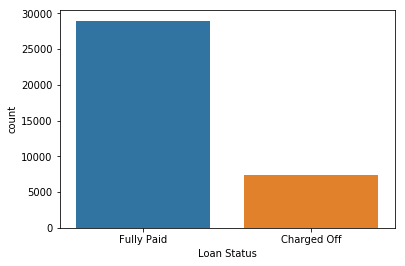

In [13]:
sns.countplot(x='Loan Status',data =datadf_con)

#### Categorical Variables Transformation

In [14]:
datadf_con['Loan Status'] = [0 if x == 'Fully Paid' else 1 for x in datadf_con['Loan Status']]


C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
datadf_con['Term'] = [0 if x == 'Short Term' else 1 for x in datadf_con['Term']]

C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
datadf_con['Years in current job']=datadf_con['Years in current job'].str.extract(r"(\d+)")
datadf_con['Years in current job'] = datadf_con['Years in current job'].astype(float)

C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
datadf_con['Purpose'].replace('other','Other',inplace = True)

C:\Users\saipr\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
datadf_f = pd.get_dummies(datadf_con)
datadf_f

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,0,99999999.0,0,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,...,0,0,0,0,0,0,0,0,0,0
6,0,217646.0,0,730.0,1184194.0,1.0,10855.08,19.6,10.0,13.0,...,0,0,0,0,0,0,0,0,0,0
8,0,548746.0,0,678.0,2559110.0,2.0,18660.28,22.6,33.0,4.0,...,0,0,0,0,0,0,0,0,0,0
10,0,99999999.0,0,728.0,714628.0,3.0,11851.06,16.0,76.0,16.0,...,0,0,0,0,0,0,0,0,0,0
12,0,99999999.0,0,740.0,776188.0,1.0,11578.22,8.5,25.0,6.0,...,0,0,0,0,0,0,0,0,0,0
14,0,234124.0,0,727.0,693234.0,10.0,14211.24,24.7,46.0,10.0,...,0,0,0,0,0,0,0,0,0,0
17,0,666204.0,1,723.0,1821967.0,10.0,17612.24,22.0,34.0,15.0,...,0,0,0,0,0,0,0,0,0,0
20,1,317108.0,1,687.0,1133274.0,8.0,9632.81,17.4,53.0,4.0,...,0,0,0,0,0,0,0,0,0,0
25,0,465410.0,1,688.0,1722654.0,3.0,15647.45,22.3,30.0,7.0,...,0,0,0,0,0,0,0,0,0,0
28,0,99999999.0,0,746.0,1749748.0,10.0,19247.19,20.0,32.0,17.0,...,0,0,0,0,0,0,0,0,0,0


### X and Y datasets

In [19]:
datadf_f_x = datadf_f.drop(columns=['Loan Status'])

In [20]:
scaler = StandardScaler()
datadf_sc = scaler.fit_transform(datadf_f)
datadf_sc = pd.DataFrame(datadf_sc, columns=datadf_f.columns)
datadf_sc = datadf_sc.drop(columns=['Loan Status'])

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
y = datadf_f['Loan Status']
x = datadf_sc

In [159]:
y.value_counts()

0    28972
1     7451
Name: Loan Status, dtype: int64

### Train test Split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=33)

In [23]:
y_train =pd.DataFrame(y_train)
x_train = pd.DataFrame(x_train)


#### Under Sampling the data to have a better model

In [24]:
un_samp_train = x_train

In [25]:
un_samp_train['Loan Status'] = [x for x in y_train['Loan Status']]

In [26]:
fp =un_samp_train[un_samp_train['Loan Status']== 0].sample(7000,axis=0,random_state = 33)

In [27]:
co =un_samp_train[un_samp_train['Loan Status']== 1]

In [28]:
s_train = pd.concat([fp,co],axis=0)

In [29]:
s_train['Loan Status'].value_counts()

0    7000
1    5194
Name: Loan Status, dtype: int64

## Final Train Sets for X and Y

In [30]:
y_s_train = s_train['Loan Status']


In [31]:
x_s_train = s_train.loc[:, s_train.columns != 'Loan Status']


# SVM Linear

In [274]:
svm_score_lin = []
svm_lin_df = pd.DataFrame()
for cost in [0.1,1,5,10]:
    svclassifier_lin = SVC(C=cost,kernel='linear')
    scores_lin = cross_val_score(svclassifier_lin, x_s_train, y_s_train, cv=3,scoring ='f1')
    print(cost, scores_lin.mean())
    scores_lin = scores_lin.mean() 
    svm_score_lin.append(scores_lin)
    values_lin  =  [cost, scores_lin]
    values_lin = pd.DataFrame(values_lin).T
    svm_lin_df = pd.concat([svm_lin_df,values_lin])

0.1 0.44192924565359365
1 0.44192924565359365
5 0.44192924565359365
10 0.44192924565359365


In [275]:
svm_lin_df.columns = ['Cost', 'F1 Score']

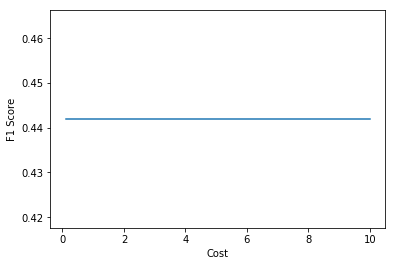

In [280]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
sns.lineplot(data=svm_lin_df ,x='Cost', y='F1 Score', legend='full', palette = flatui)
# svm_ax_lin.set(ylim=(0.70, 0.90))
plt.show()

In [174]:
y_s_train.value_counts()

0    7000
1    5194
Name: Loan Status, dtype: int64

In [100]:
svclassifier_lin = SVC(C=20,kernel='linear')
svclassifier_lin.fit(x_s_train, y_s_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [101]:
y_train_pred_lin = svclassifier_lin.predict(x_s_train)

In [102]:
print('Confusion Matrix For Linear Train')
print(pd.DataFrame(confusion_matrix(y_s_train,y_train_pred_lin),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Linear Train')
print(classification_report(y_s_train,y_train_pred_lin))
print('')
print('Accuracy for Linear Train')
print(accuracy_score(y_s_train,y_train_pred_lin))

Confusion Matrix For Linear Train
          Predicted 0  Predicted 1
Actual 0         6897          103
Actual 1         3685         1509

Classification Report For Linear Train
              precision    recall  f1-score   support

           0       0.65      0.99      0.78      7000
           1       0.94      0.29      0.44      5194

   micro avg       0.69      0.69      0.69     12194
   macro avg       0.79      0.64      0.61     12194
weighted avg       0.77      0.69      0.64     12194


Accuracy for Linear Train
0.6893554206987043


In [103]:
y_test_pred_lin = svclassifier_lin.predict(x_test)

In [104]:
print('Confusion Matrix For Linear Test')
print(pd.DataFrame(confusion_matrix(y_test,y_test_pred_lin),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Linear Test')
print(classification_report(y_test,y_test_pred_lin))
print('')
print('Accuracy For Linear Test')
print(accuracy_score(y_test,y_test_pred_lin))

Confusion Matrix For Linear Test
          Predicted 0  Predicted 1
Actual 0         8513          157
Actual 1         1622          635

Classification Report For Linear Test
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      8670
           1       0.80      0.28      0.42      2257

   micro avg       0.84      0.84      0.84     10927
   macro avg       0.82      0.63      0.66     10927
weighted avg       0.83      0.84      0.80     10927


Accuracy For Linear Test
0.8371922760135444


In [105]:
train_sizes_lin, train_scores_lin, validation_scores_lin = learning_curve(SVC(kernel='linear'), 
                                                             X = x_s_train, 
                                                             y = y_s_train, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1],
                                                             cv=5,
                                                             random_state=5,
                                                             shuffle=True,scoring ='f1'
                                                                         )

In [109]:
print('Training scores:\n\n', train_scores_lin)
print('\nValidation scores:\n\n', validation_scores_lin)

Training scores:

 [[0.43551402 0.45065177 0.42610365 0.43870968 0.44739336]
 [0.4198001  0.45244691 0.44404169 0.46588869 0.44147465]
 [0.4388445  0.45115562 0.46258907 0.45521024 0.44067797]
 [0.43354356 0.44602013 0.44536653 0.4443937  0.43784787]
 [0.43391337 0.44366844 0.44884488 0.44765739 0.44105205]]

Validation scores:

 [[0.46187364 0.44653179 0.40366972 0.40122982 0.42846442]
 [0.45103858 0.44653179 0.42159763 0.43131462 0.44847605]
 [0.47598566 0.44606414 0.42722665 0.4189902  0.44673035]
 [0.4737221  0.44622093 0.42159763 0.41421013 0.44673035]
 [0.4737221  0.44622093 0.42159763 0.4189902  0.44673035]]


In [110]:
train_scores_lin_mean = train_scores_lin.mean(axis=1)
validation_scores_lin_mean = validation_scores_lin.mean(axis=1)
print(train_scores_lin_mean)
print(validation_scores_lin_mean)

[0.4396745  0.44473041 0.44969548 0.44143436 0.44302723]
[0.42835388 0.43979174 0.4429994  0.44049623 0.44145224]


In [111]:
train_sizes = [0.2,0.4,0.6,0.8,1]

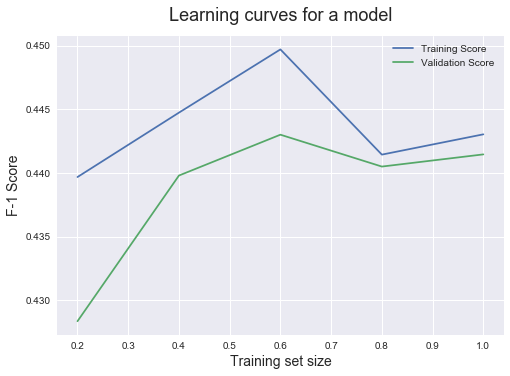

In [112]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_lin_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_lin_mean, label = 'Validation Score')
plt.ylabel('F-1 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

In [113]:
svm_score_pol = []
svm_pol_df = pd.DataFrame()
for cost in [0.1, 1, 5, 10]:
    for deg in [1,2,3,4]:
        svclassifier_pol = SVC(C = cost, kernel = 'poly',degree = deg,gamma ='auto')
        scores_pol = cross_val_score(svclassifier_pol, x_s_train, y_s_train, cv=3,scoring ='f1')
        print(cost, deg, scores_pol.mean())
        svm_score_pol.append(scores_pol.mean())
        scores_pol = scores_pol.mean()
        values_pol  =  [cost,deg,scores_pol]
        values_pol = pd.DataFrame(values_pol).T
        svm_pol_df = pd.concat([svm_pol_df,values_pol])

0.1 1 0.4280652223817188
0.1 2 0.432684334044764
0.1 3 0.43728993896508034
0.1 4 0.438056380647873
1 1 0.44192924565359365
1 2 0.49270016027011004
1 3 0.44849405526974345
1 4 0.4475724829805509
5 1 0.44192924565359365
5 2 0.523130962285527
5 3 0.5282057870735303
5 4 0.4752271330152927
10 1 0.44192924565359365
10 2 0.522130239047307
10 3 0.532244759960529
10 4 0.5067697017611673


In [114]:
svm_pol_df.columns = ['Cost','Degree','F1 Score']

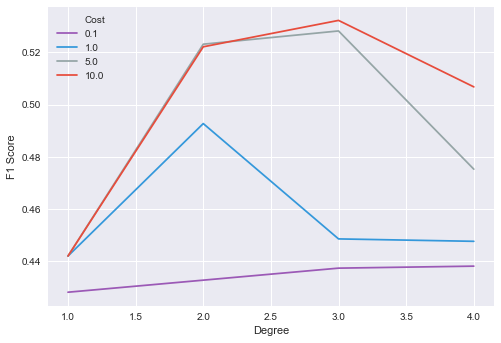

In [115]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
sns.lineplot(data=svm_pol_df ,x='Degree', y='F1 Score', hue= 'Cost', legend='full', palette = flatui   )

In [116]:
svclassifier_pol = SVC(C=10, kernel='poly',degree = 3, gamma='auto')
svclassifier_pol.fit(x_s_train, y_s_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
y_train_pred_pol = svclassifier_pol.predict(x_s_train)
print('Confusion Matrix For Polynomial Train')
print(pd.DataFrame(confusion_matrix(y_s_train,y_train_pred_pol),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Polynomial Train')
print(classification_report(y_s_train,y_train_pred_pol))
print('')
print('Accuracy for Polynomial Train')
print(accuracy_score(y_s_train,y_train_pred_pol))

Confusion Matrix For Polynomial Train
          Predicted 0  Predicted 1
Actual 0         6519          481
Actual 1         2826         2368

Classification Report For Polynomial Train
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      7000
           1       0.83      0.46      0.59      5194

   micro avg       0.73      0.73      0.73     12194
   macro avg       0.76      0.69      0.69     12194
weighted avg       0.75      0.73      0.71     12194


Accuracy for Polynomial Train
0.7288010496965721


In [118]:
y_test_pred_pol = svclassifier_pol.predict(x_test)
print('Confusion Matrix For Polynomial Test')
print(pd.DataFrame(confusion_matrix(y_test,y_test_pred_pol),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Polynomial Test')
print(classification_report(y_test,y_test_pred_pol))
print('')
print('Accuracy For Polynomial Test')
print(accuracy_score(y_test,y_test_pred_pol))

Confusion Matrix For Polynomial Test
          Predicted 0  Predicted 1
Actual 0         7707          963
Actual 1         1339          918

Classification Report For Polynomial Test
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8670
           1       0.49      0.41      0.44      2257

   micro avg       0.79      0.79      0.79     10927
   macro avg       0.67      0.65      0.66     10927
weighted avg       0.78      0.79      0.78     10927


Accuracy For Polynomial Test
0.7893291845886337


In [123]:
train_sizes_pol, train_scores_pol, validation_scores_pol = learning_curve(SVC(C=10, kernel='poly',degree = 3, gamma ='auto'), 
                                                             X = x_s_train, 
                                                             y = y_s_train, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1],
                                                             cv=5,
                                                             random_state=5,
                                                             shuffle=True,scoring='f1')

In [124]:
print('Training scores:\n\n', train_scores_pol)
print('\nValidation scores:\n\n', validation_scores_pol)

Training scores:

 [[0.62843296 0.66246057 0.67687596 0.63141026 0.6193969 ]
 [0.63732129 0.63397411 0.65641026 0.63414634 0.62553357]
 [0.58678791 0.62162856 0.64150012 0.61654135 0.59872949]
 [0.5884684  0.61056231 0.6195363  0.60942568 0.58675708]
 [0.58224666 0.58858391 0.61252476 0.60169361 0.58662519]]

Validation scores:

 [[0.52798982 0.5337386  0.50426309 0.47973856 0.49740933]
 [0.56186491 0.52513966 0.50119617 0.50284991 0.54241486]
 [0.53258145 0.53902439 0.50091631 0.51681196 0.52777778]
 [0.53132832 0.54819277 0.49376559 0.51879236 0.5408805 ]
 [0.53558052 0.54656863 0.50155569 0.51870324 0.55227552]]


In [125]:
train_scores_pol_mean = train_scores_pol.mean(axis=1)
validation_scores_pol_mean = validation_scores_pol.mean(axis=1)
print(train_scores_pol_mean)
print(validation_scores_pol_mean)

[0.64371533 0.63747711 0.61303749 0.60294995 0.59433483]
[0.50862788 0.5266931  0.52342238 0.52659191 0.53093672]


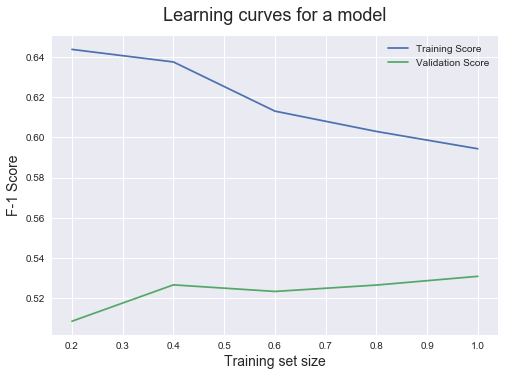

In [126]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_pol_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_pol_mean, label = 'Validation Score')
plt.ylabel('F-1 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

In [127]:
svm_score_rad = []
svm_rad_df = pd.DataFrame()
for cost in [0.1, 1, 10, 20]:
    for gam in [0.01,0.05,0.001,0.005]:
        svclassifier_rad = SVC(C = cost, kernel = 'rbf',gamma = gam)
        scores_rad = cross_val_score(svclassifier_rad, x_s_train, y_s_train, cv=3,scoring = 'f1')
        print(cost, gam, scores_rad.mean())
        svm_score_rad.append(scores_rad.mean())
        scores_rad = scores_rad.mean()
        values_rad  =  [cost,gam,scores_rad]
        values_rad = pd.DataFrame(values_rad).T
        svm_rad_df = pd.concat([svm_rad_df,values_rad])

0.1 0.01 0.4114721294785888
0.1 0.05 0.4016776839499649
0.1 0.001 0.4177430154299198
0.1 0.005 0.4155979258009465
1 0.01 0.45092641164011127
1 0.05 0.5242000991166385
1 0.001 0.4280652223817188
1 0.005 0.43378887073489175
10 0.01 0.5253421180257394
10 0.05 0.5449681502991203
10 0.001 0.44166958755664815
10 0.005 0.5235128118030011
20 0.01 0.5278257325881571
20 0.05 0.5477955083641842
20 0.001 0.4416622921094997
20 0.005 0.5246730714376034


In [128]:
svm_rad_df.columns = ['Cost','Gamma','F1 Score']

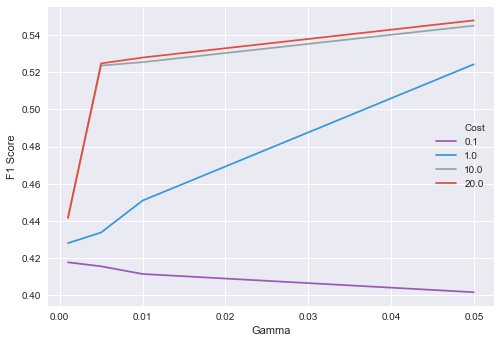

In [129]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]

ax_rad = sns.lineplot(data=svm_rad_df ,x='Gamma', y='F1 Score', hue= 'Cost', legend='full', palette = flatui  )
# ax_rad.set(xlim=(0.1, 20))
plt.show()

In [130]:
svclassifier_rad = SVC(C=20,kernel='rbf',gamma=0.05)
svclassifier_rad.fit(x_s_train, y_s_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
y_train_pred_rad = svclassifier_rad.predict(x_s_train)
print('Confusion Matrix For Radial Train')
print(confusion_matrix(y_s_train,y_train_pred_rad))
print('')
print('Classification Report For Radial Train')
print(classification_report(y_s_train,y_train_pred_rad))
print('')
print('Accuracy for Radial Train')
print(accuracy_score(y_s_train,y_train_pred_rad))

Confusion Matrix For Radial Train
[[6587  413]
 [2427 2767]]

Classification Report For Radial Train
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      7000
           1       0.87      0.53      0.66      5194

   micro avg       0.77      0.77      0.77     12194
   macro avg       0.80      0.74      0.74     12194
weighted avg       0.79      0.77      0.75     12194


Accuracy for Radial Train
0.7670985730687223


In [132]:
y_test_pred_rad = svclassifier_rad.predict(x_test)
print('Confusion Matrix For Radial Test')
print(confusion_matrix(y_test,y_test_pred_rad))
print('')
print('Classification Report For Radial Test')
print(classification_report(y_test,y_test_pred_rad))
print('')
print('Accuracy For Radial Test')
print(accuracy_score(y_test,y_test_pred_rad))

Confusion Matrix For Radial Test
[[7510 1160]
 [1282  975]]

Classification Report For Radial Test
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8670
           1       0.46      0.43      0.44      2257

   micro avg       0.78      0.78      0.78     10927
   macro avg       0.66      0.65      0.65     10927
weighted avg       0.77      0.78      0.77     10927


Accuracy For Radial Test
0.7765168847808182


In [133]:
train_sizes_rad, train_scores_rad, validation_scores_rad = learning_curve(SVC(C=20,kernel='rbf',gamma=0.05), 
                                                             X = x_s_train, 
                                                             y = y_s_train, 
                                                             train_sizes = [0.1,0.25,0.5,0.7,1],
                                                             cv=5,
                                                             random_state=5,
                                                             shuffle=True,scoring='f1')
print('Training scores:\n\n', train_scores_rad)
print('\nValidation scores:\n\n', validation_scores_rad)

Training scores:

 [[0.81036835 0.8199446  0.7965616  0.84068627 0.81907433]
 [0.73594549 0.74623407 0.75327635 0.74757835 0.76683361]
 [0.69492503 0.71033479 0.73022995 0.70718563 0.71277508]
 [0.68401015 0.69557965 0.7094938  0.68933474 0.68880897]
 [0.66966158 0.67159545 0.68222255 0.67739079 0.66735936]]

Validation scores:

 [[0.57037428 0.55508475 0.53167298 0.57522124 0.54418103]
 [0.5631929  0.56597417 0.52479815 0.51919771 0.56550218]
 [0.56769056 0.5650938  0.52474108 0.52380952 0.5585168 ]
 [0.55787037 0.56819468 0.52526439 0.52962085 0.55139632]
 [0.55342137 0.56581986 0.52423698 0.53992849 0.57428068]]


In [134]:
train_scores_rad_mean = train_scores_rad.mean(axis=1)
validation_scores_rad_mean = validation_scores_rad.mean(axis=1)
print(train_scores_rad_mean)
print(validation_scores_rad_mean)

[0.81732703 0.74997357 0.71109009 0.69344546 0.67364594]
[0.55530686 0.54773302 0.54797035 0.54646932 0.55153748]


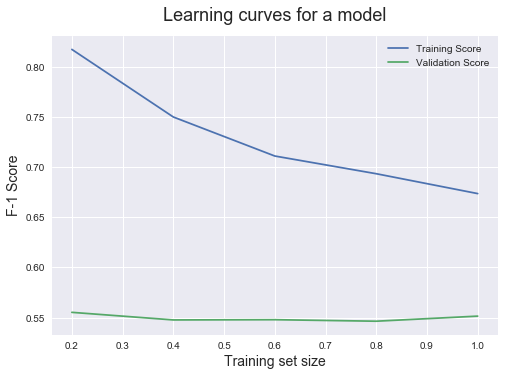

In [135]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_rad_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_rad_mean, label = 'Validation Score')
plt.ylabel('F-1 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

# Decision Tree

Resampling

In [32]:
dt = datadf_f.copy()

In [82]:
dt.shape

(36423, 33)

In [83]:
dt_y = dt['Loan Status']
dt_x = datadf_f_x.copy()

In [84]:
x_train_dt,x_test_dt,y_train_dt,y_test_dt = train_test_split(dt_x,dt_y,test_size=0.3,random_state=33)

In [85]:
y_train_dt =pd.DataFrame(y_train_dt)
# x_train_dt = pd.DataFrame(x_train_dt)

In [86]:
dt_samp_train = x_train_dt
dt_samp_train['Loan Status'] = [x for x in y_train_dt['Loan Status']]
fp_dt =dt_samp_train[dt_samp_train['Loan Status']== 0].sample(7000,axis=0,random_state = 33)
co_dt =dt_samp_train[dt_samp_train['Loan Status']== 1]
dt_s_train = pd.concat([fp_dt,co_dt],axis=0)


C:\Users\saipr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
y_s_train_dt = pd.DataFrame(dt_s_train['Loan Status'])
x_s_train_dt = dt_s_train.loc[:, dt_s_train.columns != 'Loan Status']

In [88]:
x_s_train_dt

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
88600,394812.0,0,742.0,1231295.0,2.0,943.92,12.5,43.0,8.0,71288.0,...,0,0,0,0,0,0,0,0,0,1
46235,359216.0,1,706.0,1085812.0,3.0,24430.77,13.5,37.0,7.0,142044.0,...,0,0,0,0,0,0,0,0,0,0
40121,130284.0,0,696.0,1116459.0,8.0,14886.12,13.4,26.0,7.0,114836.0,...,0,0,0,0,0,0,0,0,0,0
4810,438196.0,1,674.0,1475920.0,8.0,18080.02,23.1,74.0,17.0,134444.0,...,0,0,0,0,0,0,0,0,0,0
66172,484000.0,1,721.0,1412669.0,10.0,20012.70,32.4,18.0,8.0,165870.0,...,1,0,0,0,0,0,0,0,0,0
65560,159896.0,0,730.0,1438547.0,10.0,28411.08,29.1,18.0,13.0,637754.0,...,0,0,0,0,0,0,0,0,0,0
73825,98318.0,0,693.0,283062.0,1.0,4812.13,22.2,60.0,8.0,162754.0,...,0,0,0,0,0,0,0,0,0,0
9069,156266.0,0,739.0,1927930.0,6.0,5896.27,15.0,80.0,6.0,197562.0,...,0,0,0,0,0,0,0,0,0,0
91606,789096.0,1,640.0,1522641.0,1.0,30326.09,21.0,13.0,16.0,478401.0,...,0,0,0,0,0,0,0,0,0,0
77947,579216.0,1,701.0,2508095.0,8.0,32396.33,14.4,47.0,16.0,432060.0,...,1,0,0,0,0,0,0,0,0,0


In [90]:
d_score = []
dt_en_df = pd.DataFrame()
for depth in [5,8,9,10,11,12,15,18,20,35,30]:
    for maxf in [0.2,0.4,0.6,0.8,1]:
        en_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = depth, max_features = maxf)
        d_scores = cross_val_score(en_clf, x_s_train_dt, y_s_train_dt, cv=3,scoring ='f1')
        print(depth, maxf, d_scores.mean())
        d_score.append(d_scores.mean())
        d_scores = d_scores.mean()
        d_values  =  [depth, maxf, d_scores]
        d_values = pd.DataFrame(d_values).T
        dt_en_df = pd.concat([dt_en_df,d_values])

5 0.2 0.4744977188680404
5 0.4 0.4960936110750547
5 0.6 0.5238650825406946
5 0.8 0.5279282818235917
5 1 0.16424946226773487
8 0.2 0.5316755386899146
8 0.4 0.536801688207866
8 0.6 0.5560863728732838
8 0.8 0.5551360887594748
8 1 0.35860805440281096
9 0.2 0.4968382181197637
9 0.4 0.5599519116994472
9 0.6 0.5596077530305309
9 0.8 0.5477880936543174
9 1 0.33103198789607674
10 0.2 0.5387366257507673
10 0.4 0.565667192760547
10 0.6 0.5515713795083114
10 0.8 0.5626165591514661
10 1 0.33867657077796576
11 0.2 0.5232885238109568
11 0.4 0.5487512640385647
11 0.6 0.5727517846625185
11 0.8 0.5779060334688672
11 1 0.20638192991449955
12 0.2 0.5656980480050313
12 0.4 0.568873886504973
12 0.6 0.5765426285151313
12 0.8 0.5745198005229277
12 1 0.36287169197546665
15 0.2 0.5443429835337649
15 0.4 0.5814112646351969
15 0.6 0.5852153683425675
15 0.8 0.5828583079122102
15 1 0.41962849175765005
18 0.2 0.5530799419004969
18 0.4 0.5720442111683764
18 0.6 0.5861613530446839
18 0.8 0.5876603587697312
18 1 0.4664

In [41]:
dt_en_df.columns = ['Depth','% MaxFeatures','F1 Score']

In [42]:
dt_en_df['F1 Score'].max()

0.5965449315221979

In [493]:
30 0.8 0.5964530304301857

SyntaxError: invalid syntax (<ipython-input-493-c4488a42e93b>, line 1)

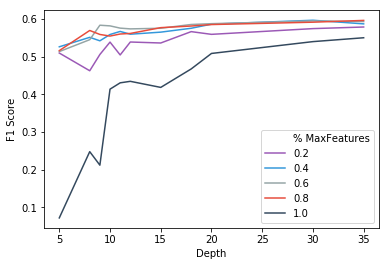

In [43]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
# , "#2ecc71"
sns.lineplot(data=dt_en_df ,x='Depth', y='F1 Score', hue= '% MaxFeatures', legend='full', palette = flatui )

In [54]:
d2_score = []
dt_en_df2 = pd.DataFrame()
for depth in [5,8,9,10,11,12,15,18,20,35,30]:
    for maxlf in [10,20,50,100,150,200,250,275,300]:
        en_clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth = depth, max_leaf_nodes = maxlf,)
        d_scores2 = cross_val_score(en_clf2, x_s_train_dt, y_s_train_dt, cv=3,scoring='f1')
        print(depth, maxlf, d_scores2.mean())
        d_score.append(d_scores2.mean())
        d_scores2 = d_scores2.mean()
        d_values2  =  [depth, maxlf, d_scores2]
        d_values2 = pd.DataFrame(d_values2).T
        dt_en_df2 = pd.concat([dt_en_df2,d_values2])

5 10 0.5648865866259399
5 20 0.5536403605400366
5 50 0.5536403605400366
5 100 0.5536403605400366
5 150 0.5536403605400366
5 200 0.5536403605400366
5 250 0.5536403605400366
5 275 0.5536403605400366
5 300 0.5536403605400366
8 10 0.5732131918999613
8 20 0.5744146489990759
8 50 0.5737801502732275
8 100 0.5628338341832576
8 150 0.5628922109010938
8 200 0.562257282460059
8 250 0.5628402083155395
8 275 0.5621561141682784
8 300 0.5623436435052562
9 10 0.5732131918999613
9 20 0.5789575101225344
9 50 0.5829708264862242
9 100 0.5778944062116579
9 150 0.5794747906271573
9 200 0.5796059003124199
9 250 0.5790580614281499
9 275 0.5799393589834471
9 300 0.5804646054957047
10 10 0.5732131918999613
10 20 0.575291313446749
10 50 0.5802048089164803
10 100 0.5686396880697394
10 150 0.5742524060143156
10 200 0.5751537201248107
10 250 0.5752475146418335
10 275 0.5758827802595233
10 300 0.5751121709730218
11 10 0.5732131918999613
11 20 0.575291313446749
11 50 0.5807229902484154
11 100 0.5757240342371679
11 15

In [57]:
dt_en_df2.columns = ['Depth','Max LF','F1 Score']

In [58]:
dt_en_df2['F1 Score'].max()

0.5914640874264038

In [ ]:
12 100 
20 0.8 

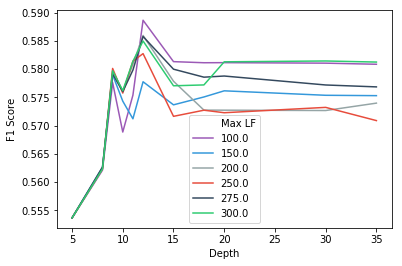

In [47]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# 
sns.lineplot(data=dt_en_df2 ,x = 'Depth', y ='F1 Score', hue = 'Max LF', legend ='full', palette = flatui )

#### Best Attributes are Max Depth of 20 at Max leaf nodes 100 and max features at 0.6

In [97]:
train_dict ={}
test_dict ={}
max_depth =[18]
for depth in max_depth:    
    # Create Decision Tree classifer object
    d_clf = DecisionTreeClassifier(criterion="entropy", max_depth= depth, max_features = 0.8,max_leaf_nodes =50)

    # Train Decision Tree Classifer
    d_clf = d_clf.fit(x_s_train_dt,y_s_train_dt)

    d_y_pred_train = d_clf.predict(x_s_train_dt)
    #Predict the response for test dataset
    d_y_pred_test = d_clf.predict(x_test_dt)
    # Model Accuracy
    print('Depth:',depth)
    train_accuracy = metrics.f1_score(y_s_train_dt, d_y_pred_train)
    test_accuracy = metrics.f1_score(y_test_dt, d_y_pred_test)
    print("Train Score:",train_accuracy)
    print("Test Accuracy:",test_accuracy)
    train_dict[depth]= train_accuracy
    test_dict[depth]= test_accuracy

Depth: 18
Train Score: 0.6201880035810207
Test Accuracy: 0.4789898571724281


In [99]:
print("Training Metrics")
print('Accuracy Score : ' + str(accuracy_score(y_s_train_dt,d_y_pred_train)))
print('Precision Score : ' + str(precision_score(y_s_train_dt,d_y_pred_train)))
print('Recall Score : ' + str(recall_score(y_s_train_dt,d_y_pred_train)))
print('F1 Score : ' + str(f1_score(y_s_train_dt,d_y_pred_train)))
print("Testing Metrics")
print('Accuracy Score : ' + str(accuracy_score(y_test_dt,d_y_pred_test)))
print('Precision Score : ' + str(precision_score(y_test_dt,d_y_pred_test)))
print('Recall Score : ' + str(recall_score(y_test_dt,d_y_pred_test)))
print('F1 Score : ' + str(f1_score(y_test_dt,d_y_pred_test)))

Training Metrics
Accuracy Score : 0.7216663933081844
Precision Score : 0.7405130946018172
Recall Score : 0.5335001925298422
F1 Score : 0.6201880035810207
Testing Metrics
Accuracy Score : 0.769653152740917
Precision Score : 0.4494949494949495
Recall Score : 0.5126273814798405
F1 Score : 0.4789898571724281


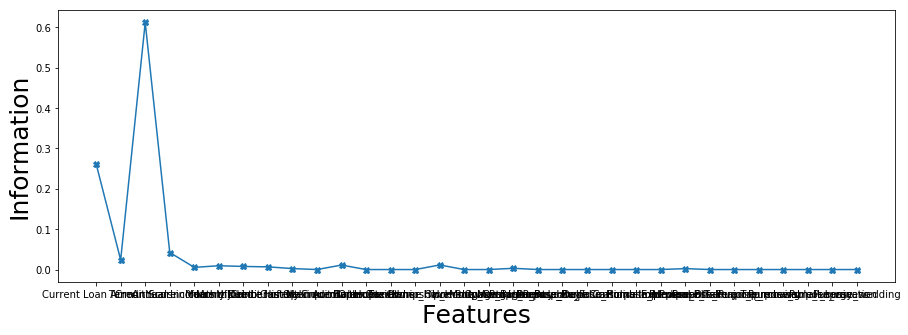

In [70]:
best_features=dict(zip(x_s_train_dt.columns, d_clf.feature_importances_.round(4)))
best_features=pd.DataFrame(best_features,index=['Importance']).T
plt.figure(figsize=(15,5))
plt.plot(best_features,marker='X')
plt.xlabel('Features',fontsize=25)
plt.ylabel('Information',fontsize=25)
plt.show()

Text(0.5, 1.0, 'Feature Importances')

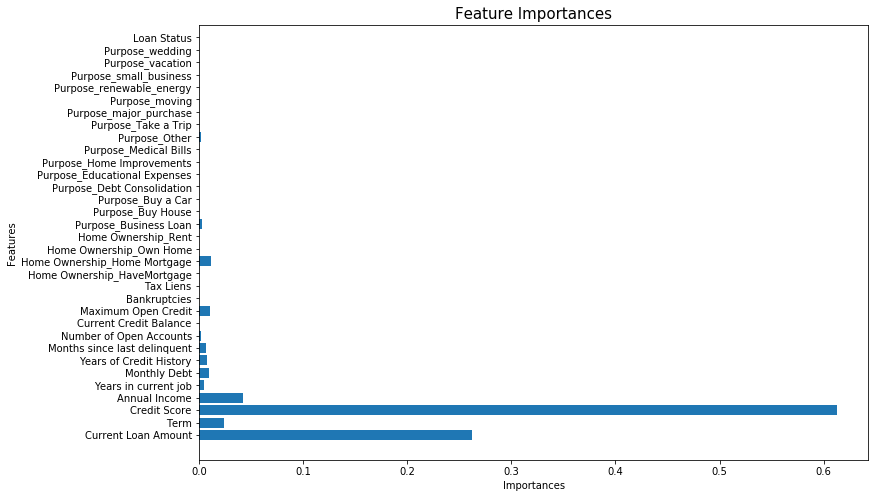

In [73]:
plt.figure(figsize=(12,8))
plt.barh(range(len(x_s_train_dt.columns)), d_clf.feature_importances_, align='center')
plt.yticks(np.arange(len(x_train.columns)), x_train.columns)
plt.ylabel('Features')
plt.xlabel('Importances')
plt.title('Feature Importances',fontsize=15)

In [629]:
train_sizes_dt_en, train_scores_dt_en, validation_scores_dt_en = learning_curve(DecisionTreeClassifier(criterion="entropy", max_depth= 18, max_features = 0.8,max_leaf_nodes =100), 
                                                             X = x_s_train_dt, 
                                                             y = y_s_train_dt, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1],scoring ='f1')
print('Training scores:\n\n', train_scores_dt_en)
print('\nValidation scores:\n\n', validation_scores_dt_en)a

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\saipr\Anaconda3\lib\site-packages

Training scores:

 [[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.71386431 0.81111111 0.75722543]
 [0.55275648 0.60470085 0.58088235]
 [0.67150131 0.67030848 0.64194988]]

Validation scores:

 [[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.46120503 0.42609854 0.42321429]
 [0.50571992 0.47306602 0.46975386]
 [0.60552147 0.57422512 0.5633515 ]]


In [630]:
train_scores_dt_en_mean = train_scores_dt_en.mean(axis=1)
validation_scores_dt_en_mean = validation_scores_dt_en.mean(axis=1)
print(train_scores_dt_en_mean)
print(validation_scores_dt_en_mean)

[0.         0.         0.76073362 0.57944656 0.66125322]
[0.         0.         0.43683928 0.4828466  0.5810327 ]


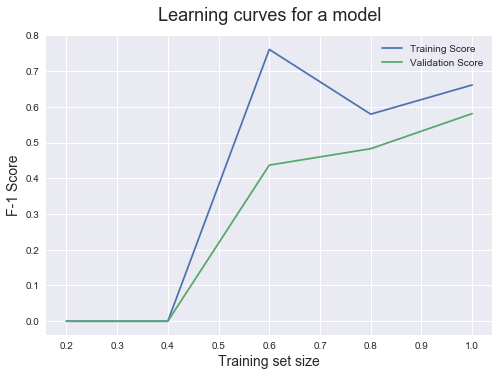

In [631]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_dt_en_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_dt_en_mean, label = 'Validation Score')
plt.ylabel('F-1 Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
Boosting

In [74]:
bo_x_train = x_s_train_dt.copy()
bo_x_test = x_test_dt.copy()
bo_y_train = pd.DataFrame(y_s_train_dt.copy())
bo_y_test = pd.DataFrame(y_test_dt.copy())

In [76]:
boost_df = pd.DataFrame()
estimators = [75,100,125]
learningrate = [0.5,0.1,0.01]
for est in estimators:
    for lrate in learningrate:
        # Create adaboost classifer object
        ada = AdaBoostClassifier(base_estimator=d_clf,n_estimators = est,
                                 learning_rate = lrate)
        # Train Adaboost Classifer
        model = ada.fit(bo_x_train, bo_y_train)
        # Predict Test Dataset
        bo_y_pred_train = model.predict(bo_x_train)
        #Predict the response for test dataset
        bo_y_pred_test = model.predict(bo_x_test)
        print("Estimators:",est)
        print("Learning Rate:",lrate)
        bo_train_acc = metrics.f1_score(bo_y_train, bo_y_pred_train)
        bo_test_acc = metrics.f1_score(bo_y_test, bo_y_pred_test)
        print("Train Accuracy:",bo_train_acc)
        print("Test Accuracy:",bo_test_acc)
        values  =  [est,lrate,bo_train_acc,bo_test_acc]
        values = pd.DataFrame(values).T
        boost_df = pd.concat([boost_df,values])

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 75
Learning Rate: 0.5
Train Accuracy: 0.99971117743333
Test Accuracy: 0.44544198895027626


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 75
Learning Rate: 0.1
Train Accuracy: 0.9300770166193758
Test Accuracy: 0.4569345866103971


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 75
Learning Rate: 0.01
Train Accuracy: 0.7466212379329926
Test Accuracy: 0.4717577948486218


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 100
Learning Rate: 0.5
Train Accuracy: 1.0
Test Accuracy: 0.44394926294137815


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 100
Learning Rate: 0.1
Train Accuracy: 0.9765984529521198
Test Accuracy: 0.4668503213957759


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 100
Learning Rate: 0.01
Train Accuracy: 0.7619586113309963
Test Accuracy: 0.47808219178082195


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 125
Learning Rate: 0.5
Train Accuracy: 1.0
Test Accuracy: 0.44236209335219234


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 125
Learning Rate: 0.1
Train Accuracy: 0.9831104168700575
Test Accuracy: 0.4577464788732395


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimators: 125
Learning Rate: 0.01
Train Accuracy: 0.8045469594967443
Test Accuracy: 0.48619528619528624


In [ ]:
Estimators: 125
Learning Rate: 0.01
Train Accuracy: 1.0
Test Accuracy: 0.7735883591104603

In [579]:
boost_df.columns=['Estimators','LearningRate','Train Score','Test Score']

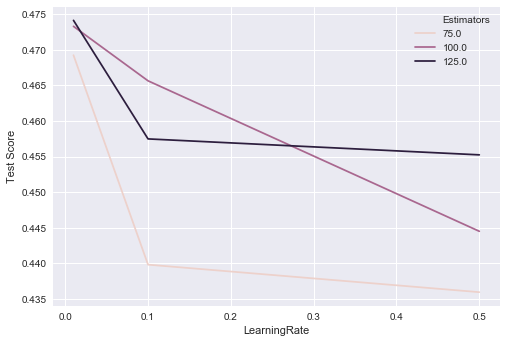

In [583]:
sns.lineplot(data=boost_df ,x='LearningRate', y='Test Score', hue ='Estimators',legend ='full')

In [98]:
 # Create adaboost classifer object
boo = AdaBoostClassifier(base_estimator=d_clf,n_estimators = 125,
                         learning_rate = 0.05)
# Train Adaboost Classifer
model = boo.fit(bo_x_train, bo_y_train)
# Predict Test Dataset
bo_y_pred_train = model.predict(bo_x_train)
#Predict the response for test dataset
bo_y_pred_test = model.predict(bo_x_test)
bo_train_acc = metrics.f1_score(bo_y_train, bo_y_pred_train)
bo_test_acc = metrics.f1_score(bo_y_test, bo_y_pred_test)
print("Train Accuracy:",bo_train_acc)
print("Test Accuracy:",bo_test_acc)

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.950597609561753
Test Accuracy: 0.47707486941381305


In [160]:
print("Testing Metrics")
print('Accuracy Score : ' + str(accuracy_score(bo_y_test,bo_y_pred_test)))
print('Precision Score : ' + str(precision_score(bo_y_test,bo_y_pred_test)))
print('Recall Score : ' + str(recall_score(bo_y_test,bo_y_pred_test)))
print('F1 Score : ' + str(f1_score(bo_y_test,bo_y_pred_test)))

Testing Metrics
Accuracy Score : 0.7526310972819621
Precision Score : 0.42342032967032966
Recall Score : 0.5463003987594152
F1 Score : 0.47707486941381305


In [166]:
train_sizes_bo, train_scores_bo, validation_scores_bo = learning_curve(AdaBoostClassifier(base_estimator=d_clf,n_estimators = 100,learning_rate = 0.5), 
                                                             X = bo_x_train, 
                                                             y = bo_y_train, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1],scoring='f1')

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

In [169]:
print('Training scores:\n\n', train_scores_bo)
print('\nValidation scores:\n\n', validation_scores_bo)

Training scores:

 [[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Validation scores:

 [[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.36740462 0.3829986  0.36928874]
 [0.54196816 0.51519644 0.52820321]
 [0.60654762 0.58515284 0.59436534]]


In [170]:
train_scores_bo_mean = train_scores_bo.mean(axis=1)
validation_scores_bo_mean = validation_scores_bo.mean(axis=1)

In [171]:
print(train_scores_bo_mean)
print(validation_scores_bo_mean)

[0. 0. 1. 1. 1.]
[0.         0.         0.37323065 0.52845594 0.59535527]


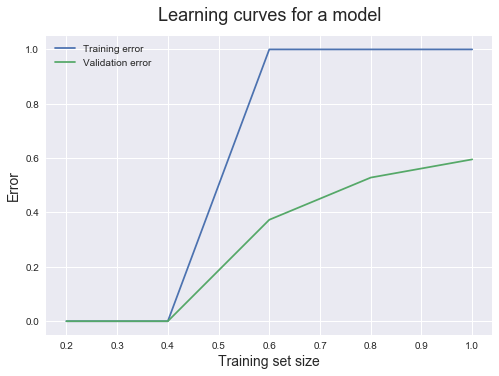

In [172]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_bo_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_bo_mean, label = 'Validation error')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()